In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dfins=pd.read_csv(r"D:\MACHINE LEARNING PGA50\ML PGA50\Linear Regression Project\Linear Regression Project\Dataset\insurance.csv")

In [9]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Nans

In [10]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
dfins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Error detection:

In [12]:
dfins["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [13]:
dfins["sex"].unique()

array(['female', 'male'], dtype=object)

In [14]:
dfins["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [15]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [16]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
dfins["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
dfins["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [19]:
dfins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [20]:
dfins["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: >

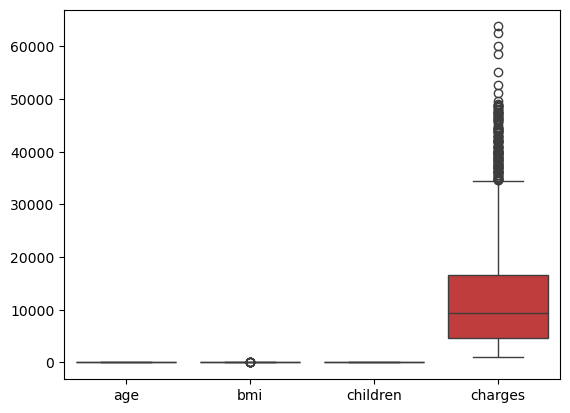

In [22]:
sns.boxplot(dfins)

<Axes: ylabel='bmi'>

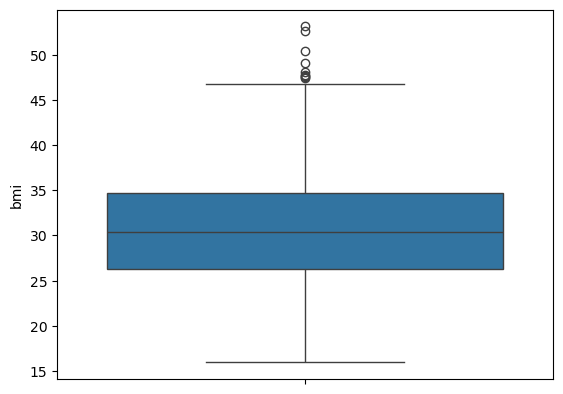

In [23]:
sns.boxplot(dfins["bmi"])

## Indentify the errors:

In [24]:
q1=dfins["bmi"].quantile(0.25)
q1

np.float64(26.29625)

In [25]:
q3=dfins["bmi"].quantile(0.75)
q3

np.float64(34.69375)

In [26]:
dfins["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [27]:
iqr=q3-q1

In [28]:
iqr

np.float64(8.3975)

In [29]:
lowerlimit=q1-1.5*iqr
lowerlimit

np.float64(13.7)

In [30]:
upperlimit=q3+1.5*iqr
upperlimit

np.float64(47.290000000000006)

In [31]:
dfins[(dfins["bmi"]<lowerlimit) | (dfins["bmi"] > upperlimit) ]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


## Capping:

In [32]:
dfins["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [33]:
dfins["bmi"].map(lambda x: lowerlimit if x<lowerlimit else
                             upperlimit if x>upperlimit else x)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [34]:
dfins["bmi"]=dfins["bmi"].map(lambda x: lowerlimit if x<lowerlimit else
                             upperlimit if x>upperlimit else x)

In [35]:
dfins[(dfins["bmi"]<lowerlimit) | (dfins["bmi"] > upperlimit) ]

,age,sex,bmi,children,smoker,region,charges


<Axes: ylabel='bmi'>

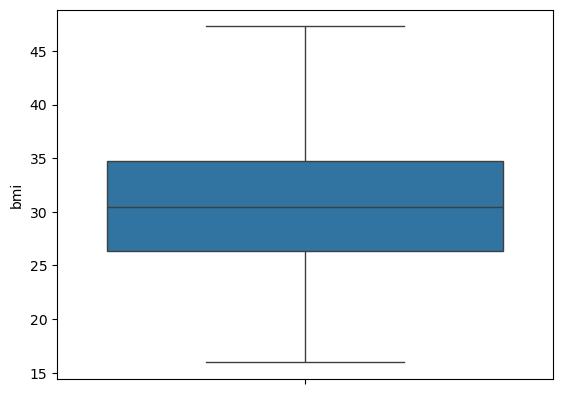

In [36]:
sns.boxplot(dfins["bmi"])

In [37]:
dfins.shape

(1338, 7)

In [38]:
dfins["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [39]:
qc1=dfins["charges"].quantile(0.25)
qc1

np.float64(4740.28715)

In [40]:
qc3=dfins["charges"].quantile(0.75)
qc3

np.float64(16639.912515)

In [41]:
iqr=qc3-qc1

In [42]:
iqr

np.float64(11899.625365)

In [43]:
lower=qc1-(1.5*iqr)
lower

np.float64(-13109.1508975)

In [44]:
upper=qc3+(1.5*iqr)
upper

np.float64(34489.350562499996)

In [45]:
dfins[(dfins["charges"]<lower) | (dfins["charges"] > upper) ]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
dfins["charges"]=dfins["charges"].map(lambda x: lower if x<lower else
                             upperif x>upper else x)

## Encoding:

In [46]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [47]:
dfins["sex"].unique()

array(['female', 'male'], dtype=object)

In [48]:
dfins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [49]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
ohe=OneHotEncoder(drop="first")

In [52]:
ohe

OneHotEncoder(drop='first')

In [53]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [54]:
dfins[["region"]]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [55]:
ohe.fit(dfins[["region"]])

OneHotEncoder(drop='first')

In [56]:
ohe.transform(dfins[["region"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1014 stored elements and shape (1338, 3)>

In [57]:

ohe.transform(dfins[["region"]]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [58]:
ary=ohe.transform(dfins[["region"]]).toarray()

In [59]:
ary

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [60]:
ohe.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [61]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [62]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
dfreg=pd.DataFrame(ary,dtype="int",columns=[ 'region_northwest', 'region_southeast', 'region_southwest'])

In [64]:
dfreg

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [65]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
pd.concat([dfins,dfreg],axis=1)

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [67]:
dfins=pd.concat([dfins,dfreg],axis=1)

In [68]:
dfins

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [69]:
dfins.drop("region",axis=1)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


In [70]:
dfins.drop("region",axis=1,inplace=True)

In [71]:
dfins

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


## Get_dummies:

In [72]:
pd.get_dummies(dfins)

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,True,False,False,True
1,18,33.770,1,1725.55230,0,1,0,False,True,True,False
2,28,33.000,3,4449.46200,0,1,0,False,True,True,False
3,33,22.705,0,21984.47061,1,0,0,False,True,True,False
4,32,28.880,0,3866.85520,1,0,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,False,True,True,False
1334,18,31.920,0,2205.98080,0,0,0,True,False,True,False
1335,18,36.850,0,1629.83350,0,1,0,True,False,True,False
1336,21,25.800,0,2007.94500,0,0,1,True,False,True,False


In [73]:
pd.get_dummies(dfins,drop_first=True)

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,False,True
1,18,33.770,1,1725.55230,0,1,0,True,False
2,28,33.000,3,4449.46200,0,1,0,True,False
3,33,22.705,0,21984.47061,1,0,0,True,False
4,32,28.880,0,3866.85520,1,0,0,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,True,False
1334,18,31.920,0,2205.98080,0,0,0,False,False
1335,18,36.850,0,1629.83350,0,1,0,False,False
1336,21,25.800,0,2007.94500,0,0,1,False,False


In [75]:
pd.get_dummies(dfins,drop_first=True).replace([True,False],[1,0])

C:\Users\Praveen Dev\AppData\Local\Temp\ipykernel_14676\3550294135.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.get_dummies(dfins,drop_first=True).replace([True,False],[1,0])


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


## Multiple columns one hot encoder:

In [76]:
dfins

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
dfins[["sex","smoker"]]

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no
...,...,...
1333,male,no
1334,female,no
1335,female,no
1336,female,no


In [87]:
ohe1=OneHotEncoder(drop="first")

In [88]:
ohe1

OneHotEncoder(drop='first')

In [89]:
ohe1.fit(dfins[["sex","smoker"]])

OneHotEncoder(drop='first')

In [90]:
ohe1.transform(dfins[["sex","smoker"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 950 stored elements and shape (1338, 2)>

In [91]:
ohe1.transform(dfins[["sex","smoker"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [92]:
ary1=ohe1.transform(dfins[["sex","smoker"]]).toarray()

In [93]:
ary1

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [94]:
ohe1.categories_

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object)]

In [96]:
pd.DataFrame(ary1,columns=["sex_male","smoker_yes"],dtype="int")

,sex_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


In [97]:
dfnew=pd.DataFrame(ary1,columns=["sex_male","smoker_yes"],dtype="int")

In [98]:
dfnew

,sex_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


In [99]:
pd.concat([dfins,dfnew],axis=1)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,female,27.900,0,yes,16884.92400,0,0,1,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,1,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0,0,0
1336,21,female,25.800,0,no,2007.94500,0,0,1,0,0


In [100]:
dfins=pd.concat([dfins,dfnew],axis=1)

In [101]:
dfins

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,female,27.900,0,yes,16884.92400,0,0,1,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,1,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0,0,0
1336,21,female,25.800,0,no,2007.94500,0,0,1,0,0


In [102]:
dfins.drop(["sex","smoker"],axis=1)

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [103]:
dfins.drop(["sex","smoker"],axis=1,inplace=True)

In [104]:
dfins

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [105]:
dfins.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
region_northwest      int64
region_southeast      int64
region_southwest      int64
sex_male              int64
smoker_yes            int64
dtype: object

## Data Separation:

In [106]:
dfins

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [107]:
dfins.drop("charges",axis=1)

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,1,0,0,0
1336,21,25.800,0,0,0,1,0,0


In [108]:
X = dfins.drop("charges",axis=1)

In [109]:
X

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,1,0,0,0
1336,21,25.800,0,0,0,1,0,0


In [110]:
y = dfins["charges"]

In [111]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Data Splitting:

In [119]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [122]:
X_train.shape

(1070, 8)

In [123]:
y_train.shape

(1070,)

In [124]:
X.shape

(1338, 8)

In [125]:
y_train.shape

(1070,)

In [126]:
y_test.shape

(268,)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr_model=LinearRegression()

In [129]:
lr_model

LinearRegression()

In [130]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [131]:
lr_model.score(X_test,y_test)

0.7457199654909237

## Auto Random state:

In [142]:
sc_list=[]
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=i)
    linreg=LinearRegression()
    linreg.fit(Xtrain,ytrain)
    sc=linreg.score(Xtest,ytest)
    # print("Random State:",i)
    # print("Score:",sc)
    sc_list.append(sc)
m=max(sc_list)
rs=sc_list.index(m)
print("Random State:",rs)
print("Score:",m)

Random State: 367
Score: 0.8331309092720207


## Auto Machine Learning Algorithm:

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [163]:
from sklearn.neighbors import KNeighborsRegressor

In [164]:
from sklearn.svm import SVR

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
dt1=DecisionTreeRegressor()

In [167]:
rfc1=RandomForestRegressor()

In [168]:
abc1=AdaBoostRegressor()

In [169]:
knn1=KNeighborsRegressor()

In [170]:
svm1=SVR()

In [171]:
linreg1=LinearRegression()

In [172]:
model=[dt1,rfc1,abc1,knn1,svm1,linreg1]

In [173]:
model

[DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 KNeighborsRegressor(),
 SVR(),
 LinearRegression()]

In [174]:
import time

In [175]:
for m in model:
    print(m)
    time.sleep(1)

DecisionTreeRegressor()
RandomForestRegressor()
AdaBoostRegressor()
KNeighborsRegressor()
SVR()
LinearRegression()


In [176]:
for m in model:
    m.fit(X_train,y_train)
    score = m.score(X_test,y_test)
    print(m,"==>",score)
    time.sleep(2)    

DecisionTreeRegressor() ==> 0.7015363708797937
RandomForestRegressor() ==> 0.8357506597261116
AdaBoostRegressor() ==> 0.8220185751050388
KNeighborsRegressor() ==> 0.14863954185874084
SVR() ==> -0.08049412572081183
LinearRegression() ==> 0.7457199654909237
